# Project Objective:

My goal with this project is to find predictors for child height median and hemoglobin levels in kenyan infants. By finding accurate predictors researchers will be able to have more personalized interventions for research, or we can find better treatments to mitigate the issues. Child height was chosen as an issue as it is a predictor for malnutrition whereas Hemoglobin levels was chosen as anemia and malaria are prevalent issues in Kenya. With regards to child height median, three height measurements were taken and I created a median height variable to reduce potential bias from outliers. 


# DATA SOURCES:

Using chrome I found the website for direct download to zip file I am interested in, a map of Kenya. I use requests to get the zip file 
and download it to my working directory. However, due to legality reasons I am unable to share the data for the project, mainly due to working publications being worked on that are not fully released and because some of the data still has personal identifiers. 


# DATA PRESENTED VISUALLY:

My first objective was to represent the data visually to make it feel more tangible rather than having the data set just be a set of points and values. I achieved this by plotting the location of the children using their GPS coordinates on a Kenyan Shape file. However, after plotting the points I found that the points only overlapped three of the polygons, as I result I subsetted out the rest of the map to make it easier to read. My original goal was to create a world cloud out of the name of the children, but due to legal reasons I am unable to do so. Instead, I used the dates of birth to have some sort of representation while simultaneously getting an idea of when children are born.

In [78]:
## I like to import all necessary packages in the beginning of all my projects. This is makes debugging easier for me

import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os

%matplotlib inline

import sqlite3 as sql
import pandas as pd
import statsmodels.formula.api as sm

# Make Jupyter to automatically display matplotlib plots.
%matplotlib inline
# Make plots larger.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)
from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import numpy as np
import shapely.geometry as geom

import os
##Set Directory
os.chdir("C:\Users\Moxigeren\Desktop\STA141B")

import requests, zipfile, StringIO

import osgeo
import numpy as np
import matplotlib.mlab as ml
from osgeo import gdal
from osgeo import osr
from mpl_toolkits.basemap import Basemap

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as interpolate

import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import statsmodels.formula.api as smf


In [2]:

r = requests.get("http://docs.wri.org/ke_district_boundaries.zip", stream=True)
z = zipfile.ZipFile(StringIO.StringIO(r.content))
z.extractall()

In [3]:
zips = gpd.read_file("ke_district_boundaries.shp")

In [4]:
zips.head()

,DISTNAME,geometry
0,BARINGO,POLYGON ((36.27933883666992 0.6243004202842712...
1,BOMET,POLYGON ((35.40040969848633 -0.651987552642822...
2,BONDO,(POLYGON ((34.26028060913086 -0.34618946909904...
3,BUNGOMA,"POLYGON ((34.3726921081543 0.7700766324996948,..."
4,BURET,POLYGON ((35.39651870727539 -0.641618132591247...


In [5]:
zips = zips.sort_values("DISTNAME", ascending = True)
zips

,DISTNAME,geometry
0,BARINGO,POLYGON ((36.27933883666992 0.6243004202842712...
1,BOMET,POLYGON ((35.40040969848633 -0.651987552642822...
2,BONDO,(POLYGON ((34.26028060913086 -0.34618946909904...
3,BUNGOMA,"POLYGON ((34.3726921081543 0.7700766324996948,..."
4,BURET,POLYGON ((35.39651870727539 -0.641618132591247...
5,BUSIA,(POLYGON ((33.9544792175293 0.1042426005005837...
6,BUTERE/MUMIAS,POLYGON ((34.62751388549805 0.1274576336145401...
7,CENTRAL KISII,POLYGON ((34.80855941772461 -0.770396173000335...
8,EMBU,POLYGON ((37.47243881225586 -0.557491958141326...
9,GARISSA,POLYGON ((40.99298858642578 -0.791167080402374...


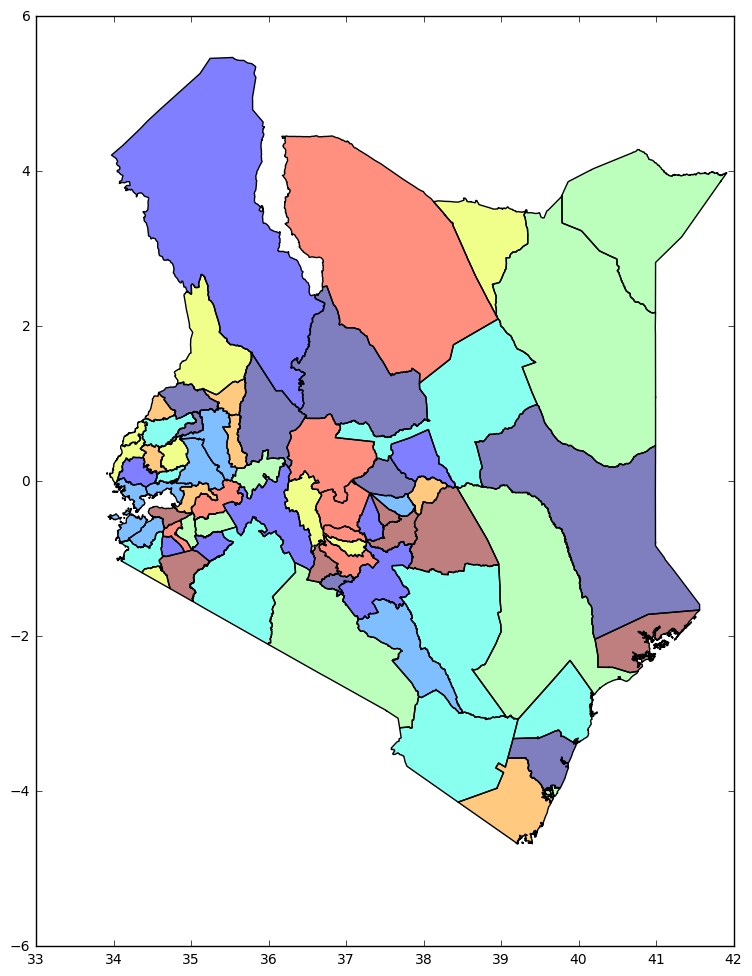

In [6]:
zips.plot()

In [76]:
"C:\Users\Moxigeren\Desktop\STA141B\ke_district_boundaries.shp"

'C:\\Users\\Moxigeren\\Desktop\\STA141B\\ke_district_boundaries.shp'

In [9]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image


In [10]:
df = pd.read_csv("D:/WASH/gps.csv", header = 0)
df.head()

,GPS_lat,GPS_long,GPS_alt,cm_20_317b
0,0.35492,34.58367,1329.642,NaN
1,0.35500,34.58384,1328.048,NaN
2,0.35034,34.58268,1354.849,NaN
3,0.35449,34.58251,1331.068,NaN
4,0.34454,34.58792,1181.271,NaN


In [11]:
df.columns = ['lat', 'lon', 'alt', 'hemoglobin']
df.head()

,lat,lon,alt,hemoglobin
0,0.35492,34.58367,1329.642,NaN
1,0.35500,34.58384,1328.048,NaN
2,0.35034,34.58268,1354.849,NaN
3,0.35449,34.58251,1331.068,NaN
4,0.34454,34.58792,1181.271,NaN


In [12]:
df = df.dropna() 

In [13]:
df.describe()

,lat,lon,alt,hemoglobin
count,625.000000,625.000000,625.000000,625.000000
mean,0.484910,34.589974,1406.427041,11.394080
std,0.150435,0.146898,147.867485,1.285601
min,0.264310,34.367070,14.000000,6.500000
25%,0.388990,34.471260,1296.682000,10.700000
50%,0.438999,34.565240,1366.376000,11.500000
75%,0.579290,34.667690,1528.660000,12.200000
max,0.806370,34.942140,2108.090000,15.100000


In [14]:
df['lat_long'] = df[['lat', 'lon']].apply(tuple, axis=1)

In [15]:
df.head()

,lat,lon,alt,hemoglobin,lat_long
75,0.34478,34.55553,1318.550,9.8,"(0.34478, 34.55553)"
76,0.34478,34.55553,1318.550,10.2,"(0.34478, 34.55553)"
96,0.34285,34.57554,1382.641,11.8,"(0.34285, 34.57554)"
97,0.34177,34.57359,1364.814,11.3,"(0.34177, 34.57359)"
98,0.34099,34.57241,1345.120,11.0,"(0.34099, 34.57241)"


In [16]:
lonlatdf = [geom.Point(lon, lat) for lon, lat in zip(df.lon, df.lat)]
df.drop(["lon", "lat"], axis = 1)


,alt,hemoglobin,lat_long
75,1318.550,9.8,"(0.34478, 34.55553)"
76,1318.550,10.2,"(0.34478, 34.55553)"
96,1382.641,11.8,"(0.34285, 34.57554)"
97,1364.814,11.3,"(0.34177, 34.57359)"
98,1345.120,11.0,"(0.34099, 34.57241)"
100,1343.659,11.6,"(0.34096, 34.57261)"
102,1385.193,13.7,"(0.34148, 34.5775)"
103,1330.625,12.1,"(0.33768, 34.57175)"
165,1348.354,9.0,"(0.31734, 34.59444)"
166,1355.384,11.2,"(0.31487, 34.60106)"


In [17]:
df2 = gpd.GeoDataFrame(df, geometry = lonlatdf, crs = {'init' :'epsg:4326'})
df2.geometry.head()

75    POINT (34.55553 0.34478)
76    POINT (34.55553 0.34478)
96    POINT (34.57554 0.34285)
97    POINT (34.57359 0.34177)
98    POINT (34.57241 0.34099)
Name: geometry, dtype: object

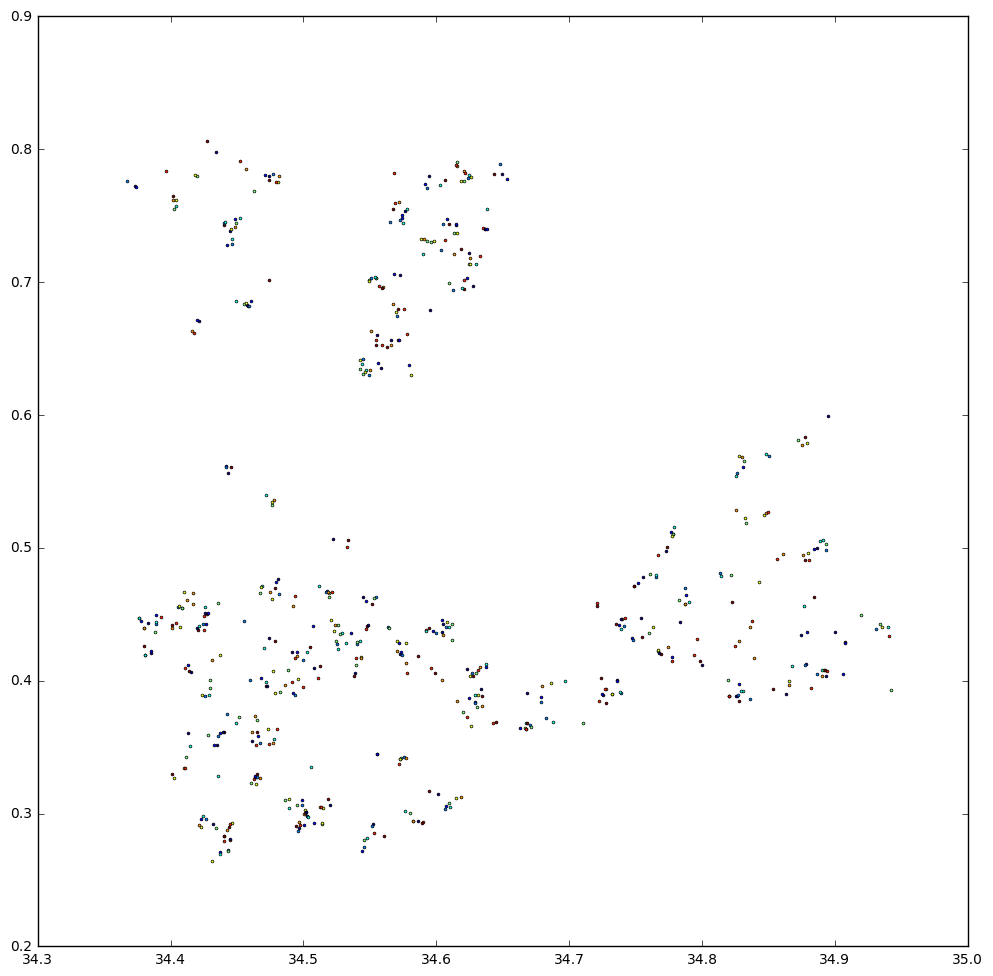

In [18]:
df2.plot()


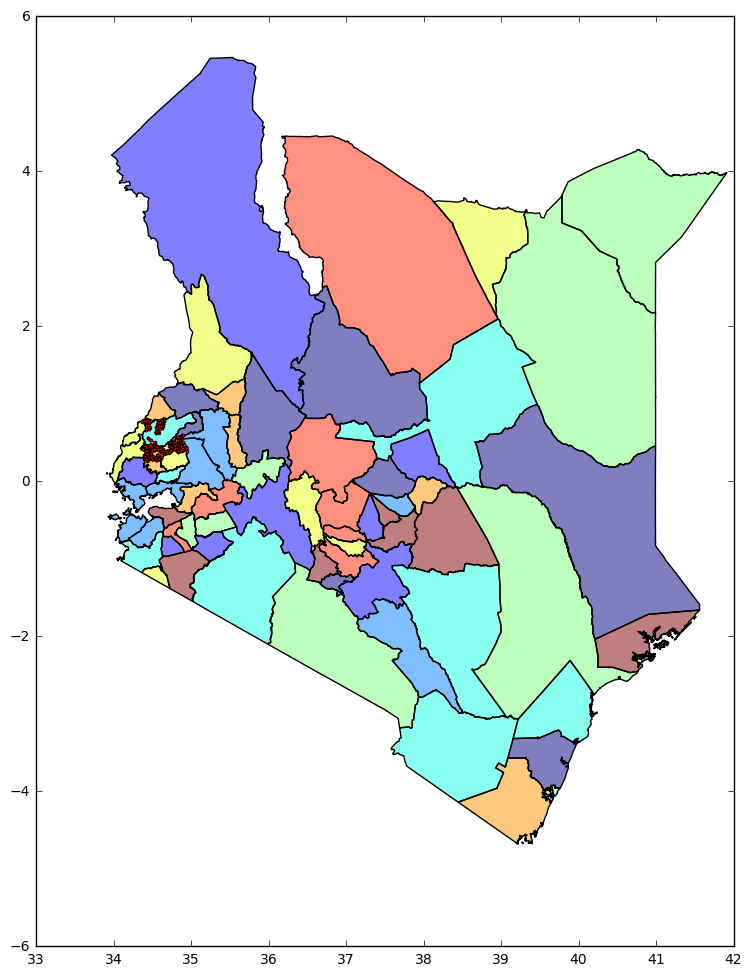

In [19]:
base1 = zips.plot()
df2.plot(ax = base1, marker = "o", color = "red")


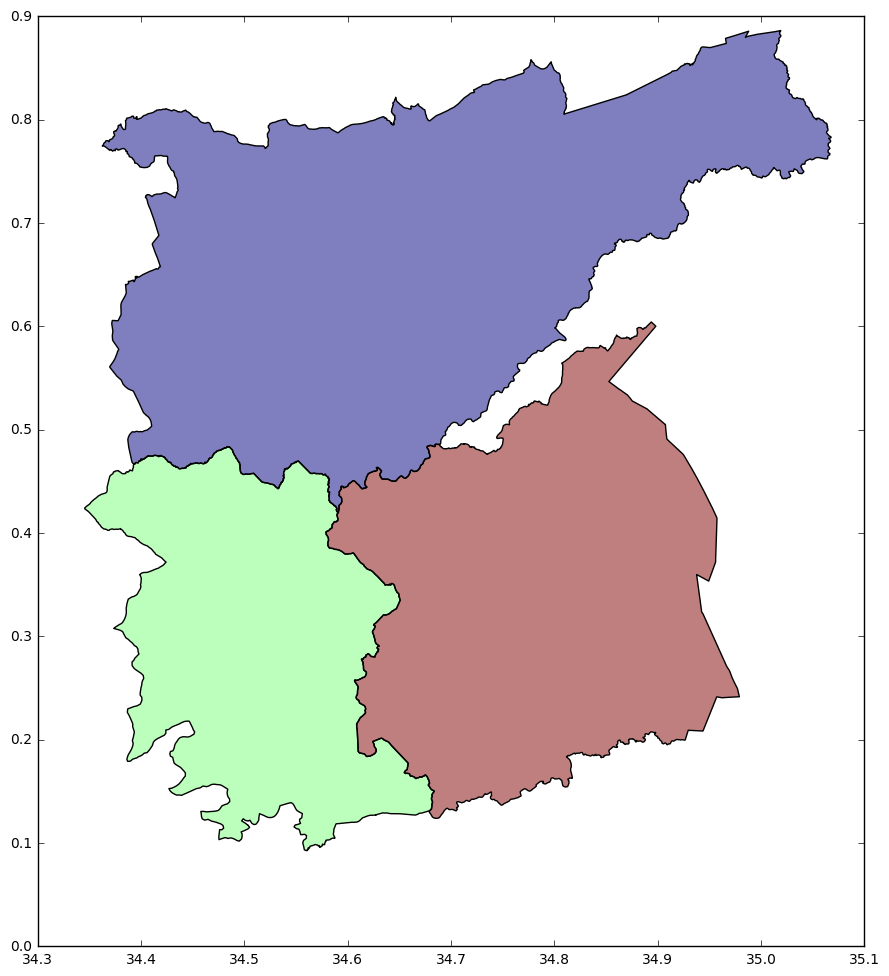

In [20]:
county = zips.loc[zips['DISTNAME'].isin(['BUNGOMA', 'BUTERE/MUMIAS', 'KAKAMEGA'])]
county.plot()

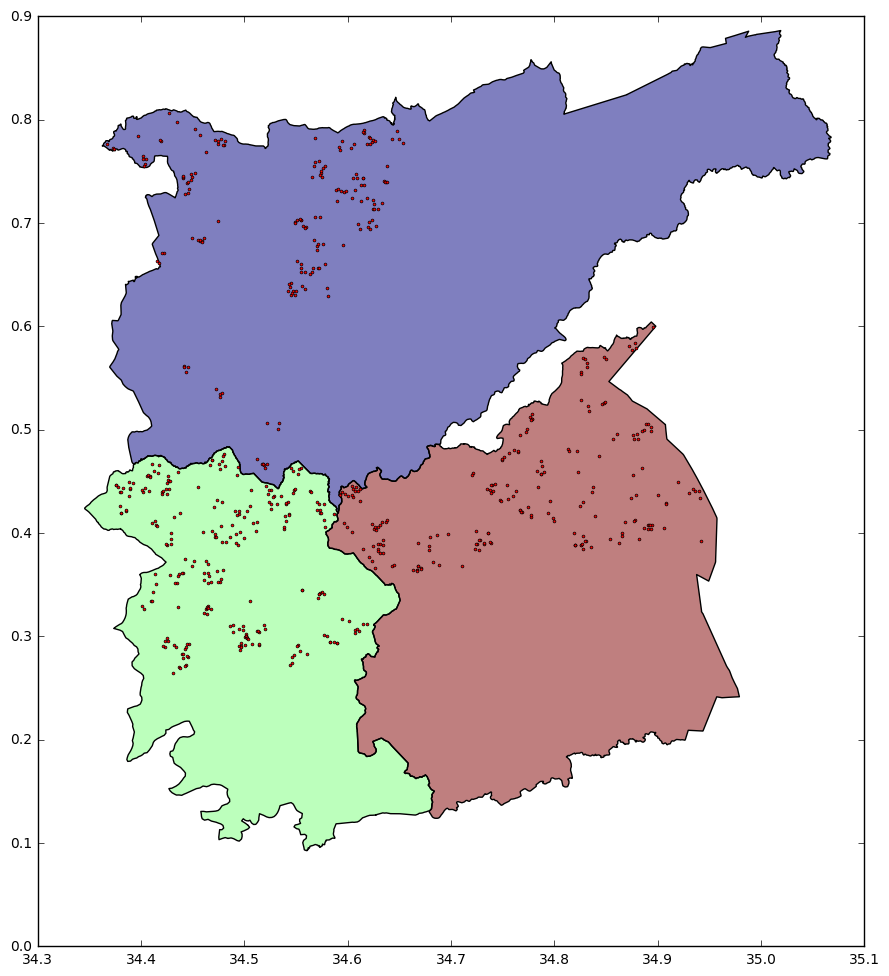

In [21]:
base = county.plot()
df2.plot(ax = base, marker = "o", color = "red")


In [22]:
type(county)

geopandas.geodataframe.GeoDataFrame

In [23]:
type(zips.geometry)


geopandas.geoseries.GeoSeries

# Hemoglobin Represented Visually

I wanted to see the relation between recorded hemoglobin levels and altitude. In addition I used gps coordinates to see where the children were located. To create a gradient I divided the recorded values by the max, and used a two-color scheme of blue and red where the more red the greater the hemoglobin level. As you can see the higher the altitude, the greater the hemoglobin levels tend to be. I first created a surface map to get an ideal of the altitude, then I created a 3-D scatterplot of the values and interpolated it with the surface plot. However a 3-D plot, while visually appealing, is not the best for inferences so future explorations will be done.

In [24]:
##See variable format for any potential issues.

for col in df.columns:
    print('{0} : {1}'.format(col, df[col].dtype))

lat : float64
lon : float64
alt : float64
hemoglobin : float64
lat_long : object
geometry : object


In [26]:
x = np.array(df['lat'])
y = np.array(df['lon'])
z = np.array(df['alt'])
h = np.array(df['hemoglobin'])

In [27]:
xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)

In [28]:
Z = ml.griddata(x, y, z, xi, yi, interp = 'linear')

In [30]:
hemo = df['hemoglobin']


In [31]:
G = np.gradient(hemo)

N = G/G.max()

N = np.broadcast_arrays(N)

In [32]:
N

[array([ 0.12698406,  0.31746028,  0.17460317, -0.12698412,  0.04761905,
         0.42857142,  0.07936508, -0.74603173, -0.14285714,  0.36507936,
        -0.09523809,  0.06349206,  0.33333333, -0.55555558, -0.34920634,
         0.38095241, -0.01587302,  0.12698412,  0.26984127, -0.01587302,
        -0.15873016, -0.06349206,  0.03174603, -0.15873022,  0.        ,
         0.1428572 ,  0.28571428, -0.52380952, -0.39682539,  0.79365078,
         0.01587302, -0.23809523,  0.11111111,  0.19047619,  0.01587302,
         0.        ,  0.06349206,  0.11111111, -0.28571428, -0.11111111,
         0.25396825,  0.36507936,  0.09523809, -0.28571428, -0.14285714,
        -0.11111111,  0.25396825, -0.04761905, -0.12698412,  0.23809523,
        -0.49206342, -0.33333333,  0.58730151,  0.07936508, -0.34920634,
         0.17460317,  0.3015873 , -0.23809523, -0.39682539,  0.19047619,
         0.19047619,  0.04761905, -0.06349206, -0.76190473,  0.        ,
         0.33333331,  0.09523809,  0.09523809, -0.0

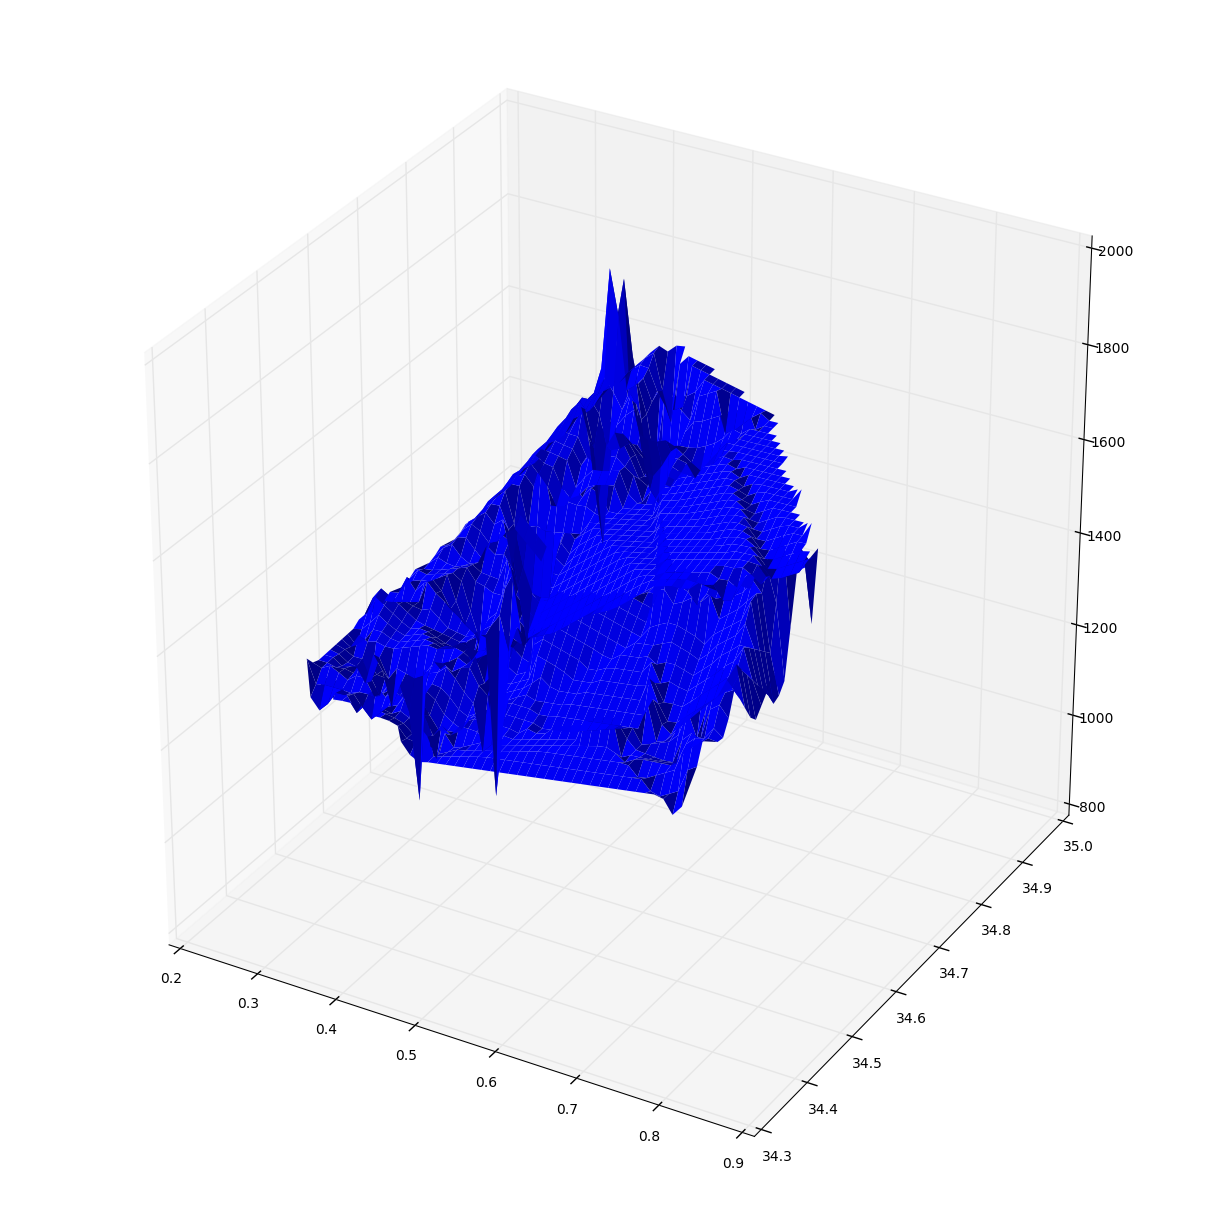

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1 ,linewidth=0, antialiased=True)
plt.show()

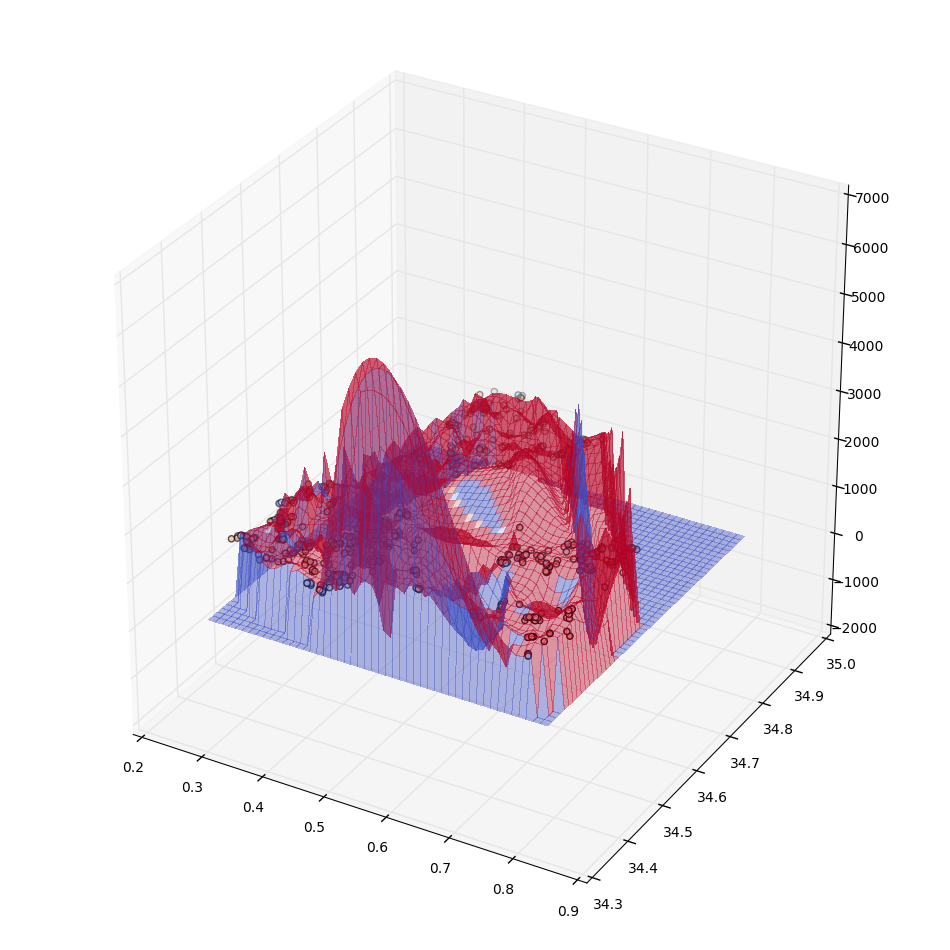

In [35]:

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)
Z = np.nan_to_num(interpolate.griddata((x, y), z, (X, Y), method='cubic'))
C = interpolate.griddata((x, y), h, (X, Y), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
cmap = cm.coolwarm
ax.scatter(x, y, z, c=h, cmap=cmap)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cmap,
                linewidth=0, antialiased=False, alpha=0.4, facecolors=cmap(C))
plt.show()
## Blue = 0 Red = 1, higher value higher hemoglobin

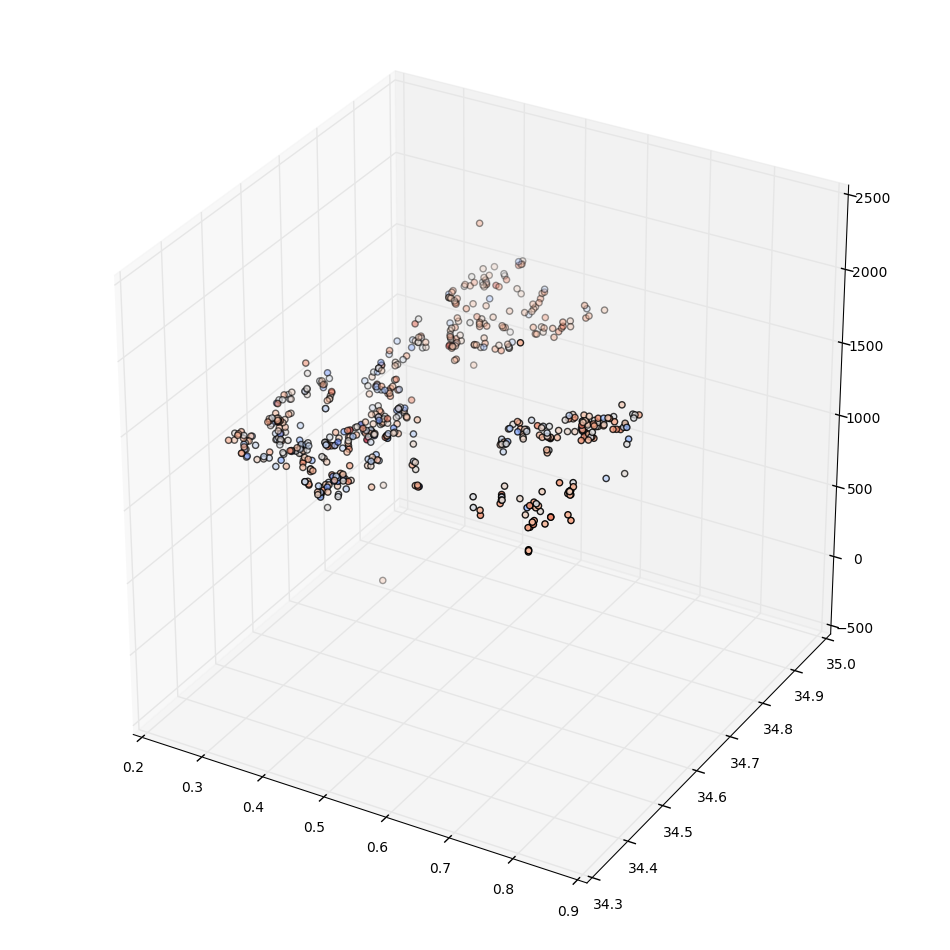

In [36]:
xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)
Z = np.nan_to_num(interpolate.griddata((x, y), z, (X, Y), method='cubic'))
C = interpolate.griddata((x, y), h, (X, Y), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = cm.coolwarm
ax.scatter(x, y, z, c=h, cmap=cmap)
plt.show()

# Finding Predictors for Child Height Median
I decided to look at three potential predictors, motherweightmedian, mother age, and asset index. For both this exploration and the one with hemoglobin I preferred not to relabel the variables as these are the names used in the paper and excel surveys. I renamed the ones above for the 3-D plot as I intended to only use those variables for the plot. I find that as mother weight median, asset index, and mother age increase, so does the expected child height median ceteris paribus. In the OLS regression, the R-Squared value is only .058, this indicates that even though all the of the variables are statistically significant at the .05 level, only 5.8% of the variation in the child height median can be explained by these three predictor variables. 

In [37]:
data = pd.read_csv("~/Desktop/STA141B/data3.csv", header = 0)

In [38]:
data.head()

,childhtmedian,motherweightmed,mother_age,assetindex
0,74.8,41.25,19.885010,-1.416872
1,77.0,NaN,27.594798,-0.679135
2,80.5,NaN,27.720739,-0.357541
3,87.2,NaN,27.263518,-0.043879
4,NaN,NaN,19.561944,-1.416872


In [39]:
data.shape

(12988, 4)

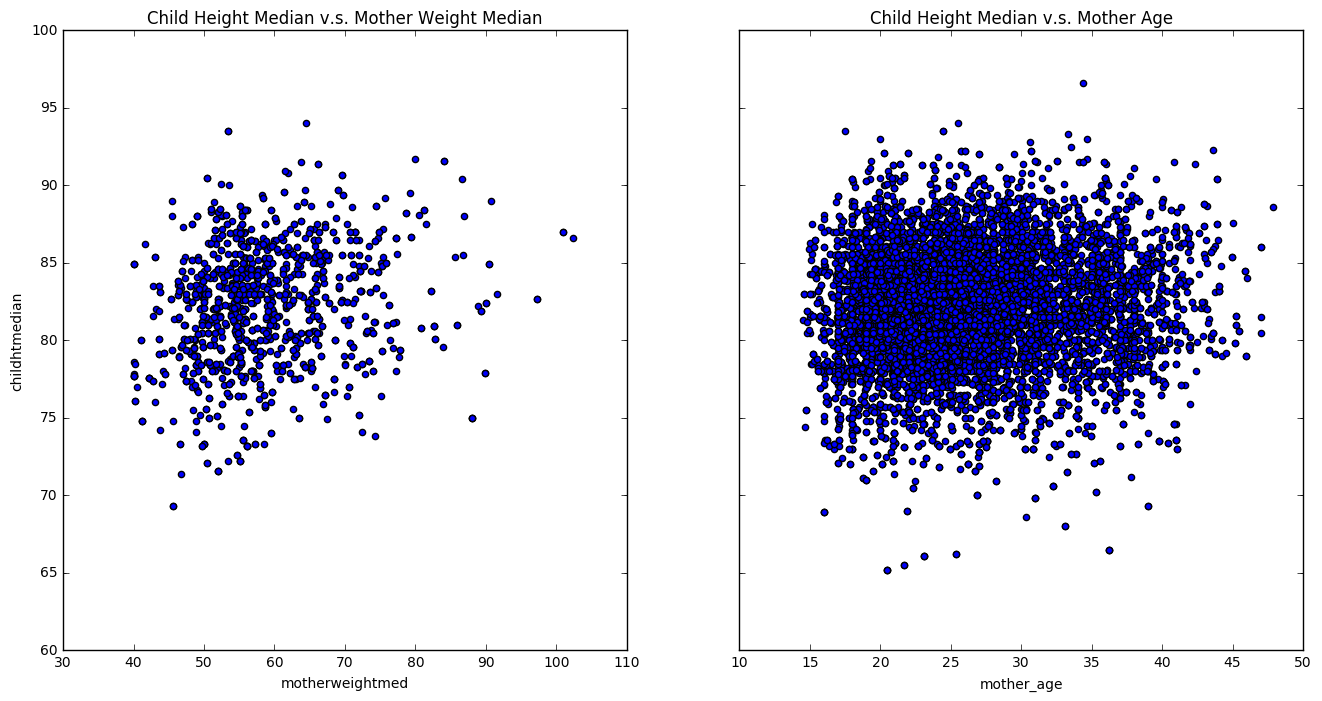

In [40]:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='motherweightmed', y='childhtmedian', title = "Child Height Median v.s. Mother Weight Median", ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='mother_age', y='childhtmedian',title = "Child Height Median v.s. Mother Age", ax=axs[1], figsize=(16, 8))


In [41]:
import statsmodels.formula.api as smf

In [42]:
lm = smf.ols(formula='childhtmedian ~ motherweightmed', data=data).fit()
lm.params

Intercept          77.549189
motherweightmed     0.079526
dtype: float64

In [43]:
X_new = pd.DataFrame({'motherweightmed': [50]})
X_new.head()

,motherweightmed
0,50


In [44]:
X_new = pd.DataFrame({'motherweightmed': [data.motherweightmed.min(), data.motherweightmed.max()]})

In [45]:
X_new.head()

,motherweightmed
0,40.0
1,102.3


In [46]:
lm.conf_int()

,0,1
Intercept,76.284984,78.813394
motherweightmed,0.058244,0.100809


In [47]:
lm.pvalues

Intercept          0.000000e+00
motherweightmed    4.037544e-13
dtype: float64

In [48]:
lm.rsquared

0.040141163680114333

In [49]:
lm = smf.ols(formula='childhtmedian ~ motherweightmed + mother_age + assetindex', data=data).fit()

In [50]:
lm.params

Intercept          76.907300
motherweightmed     0.074635
mother_age          0.037055
assetindex          0.296439
dtype: float64

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          childhtmedian   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     27.27
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           4.29e-17
Time:                        20:42:27   Log-Likelihood:                -3490.2
No. Observations:                1280   AIC:                             6988.
Df Residuals:                    1276   BIC:                             7009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          76.9073      0.766    100.434      0.000        75.405    78.410
motherweightmed     0.0746      0.011      6.861      0.000         0.053     0.096
mother_age          0.0371      0.019      1.975      0.048         0.000     0.074
assetindex          0.2964      0.067      4.436      0.000         0.165     0.428
==============================================================================
Omnibus:                        8.517   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.647
Skew:                          -0.194   Prob(JB):                       0.0133
Kurtosis:                       2.893   Cond. No.                         477.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Finding Child Height Predictors using Machine Learning packages
I downloaded Python SciPy for this exploration. I approached this with the following steps:

1. Load Data and look at univariate and multivariate Data Visualization
2. Evaluate algorithms by creating a validation dataset, testing harness using 10-fold cross validation to build a model
3. Found the best model and make predictions

I introduce both linear and non linear models and find that the Classification and Regression Trees (CART) to be the most accurate one where accuracy is measured in correct prediction percentage. The accuracy using CART appears to be around 50%.

In [53]:
dataset = pd.read_csv("~/Desktop/STA141B/data3.csv", header = 0)
dataset.head()

,childhtmedian,motherweightmed,mother_age,assetindex
0,74.8,41.25,19.885010,-1.416872
1,77.0,NaN,27.594798,-0.679135
2,80.5,NaN,27.720739,-0.357541
3,87.2,NaN,27.263518,-0.043879
4,NaN,NaN,19.561944,-1.416872


In [54]:
dataset = dataset.dropna(subset = ['childhtmedian', 'motherweightmed', 'mother_age', 'assetindex'])

In [55]:
dataset['assetindex'] = 100*dataset['assetindex']

In [56]:
dataset = dataset.astype(int)

In [57]:
dataset.head()

,childhtmedian,motherweightmed,mother_age,assetindex
0,74,41,19,-141
13,83,57,23,-74
21,75,63,22,66
36,82,55,23,110
52,82,52,29,101


In [58]:
print(dataset.describe())

       childhtmedian  motherweightmed   mother_age   assetindex
count    1280.000000      1280.000000  1280.000000  1280.000000
mean       81.813281        58.164844    24.621875     2.256250
std         3.817202         9.609008     5.554262   155.606812
min        69.000000        40.000000    14.000000  -215.000000
25%        79.000000        52.000000    21.000000  -100.000000
50%        82.000000        56.000000    24.000000   -30.000000
75%        85.000000        63.000000    28.000000    63.000000
max        94.000000       102.000000    44.000000   852.000000


In [59]:
dataset = dataset.dropna(subset = ['childhtmedian', 'motherweightmed', 'mother_age', 'assetindex'])
print(dataset.describe())

       childhtmedian  motherweightmed   mother_age   assetindex
count    1280.000000      1280.000000  1280.000000  1280.000000
mean       81.813281        58.164844    24.621875     2.256250
std         3.817202         9.609008     5.554262   155.606812
min        69.000000        40.000000    14.000000  -215.000000
25%        79.000000        52.000000    21.000000  -100.000000
50%        82.000000        56.000000    24.000000   -30.000000
75%        85.000000        63.000000    28.000000    63.000000
max        94.000000       102.000000    44.000000   852.000000


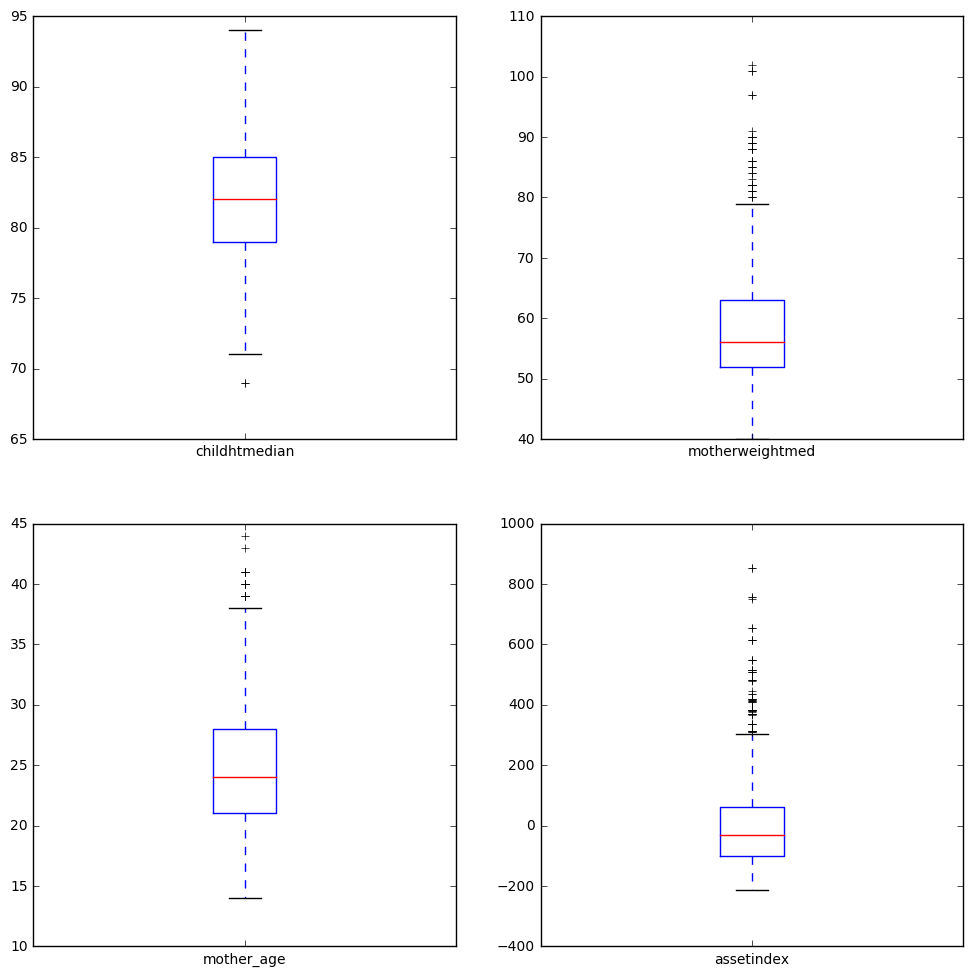

In [60]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

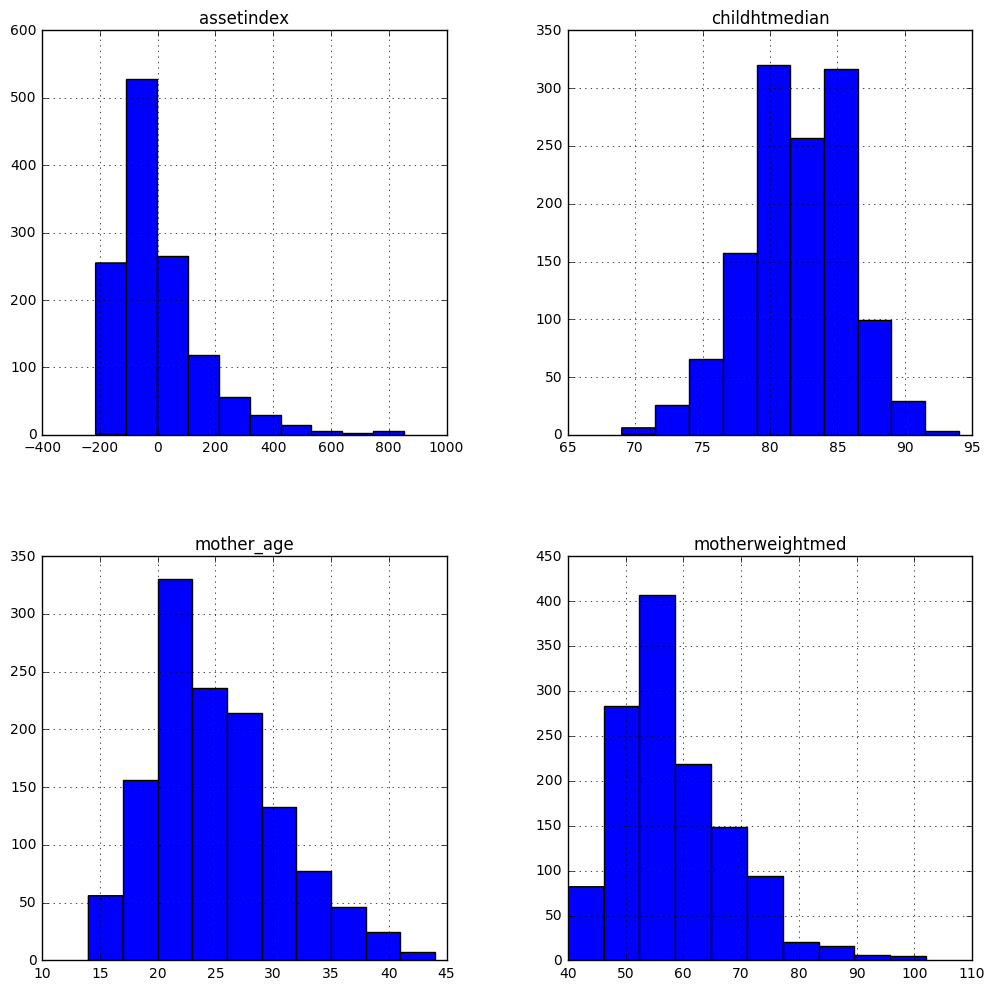

In [61]:
dataset.hist()
plt.show()

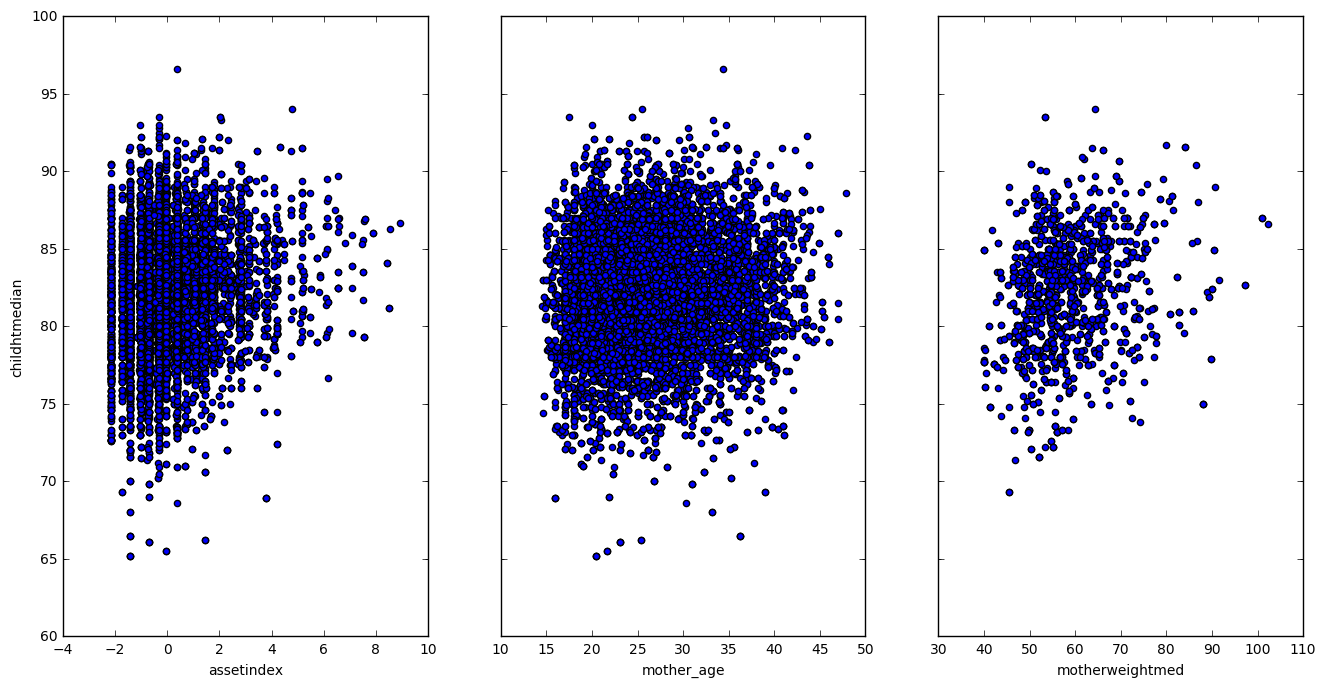

In [62]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='assetindex', y='childhtmedian', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='mother_age', y='childhtmedian', ax=axs[1])
data.plot(kind='scatter', x='motherweightmed', y='childhtmedian', ax=axs[2])

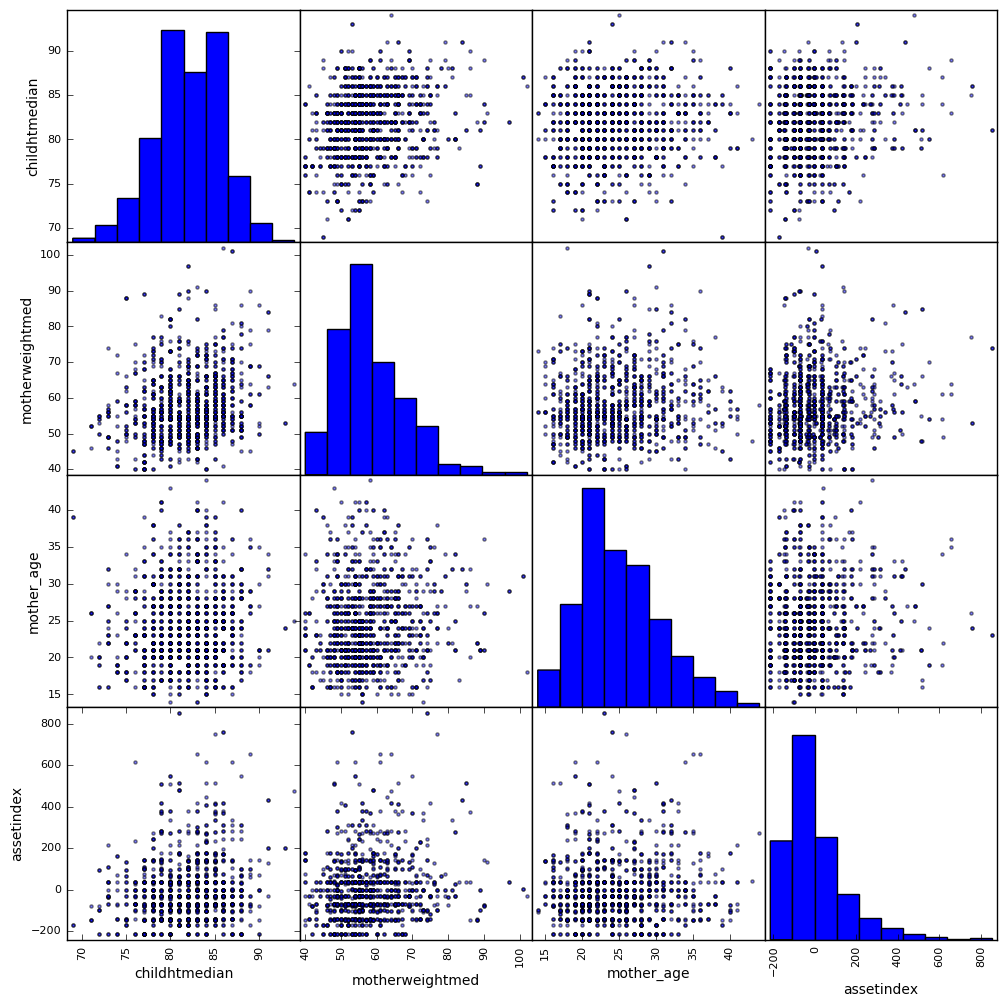

In [63]:
scatter_matrix(dataset)
plt.show()

In [64]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [65]:
seed = 7
scoring = 'accuracy'

In [66]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [67]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.081058 (0.021431)
LDA: 0.081068 (0.021486)
KNN: 0.170998 (0.036154)
CART: 0.544927 (0.058665)
NB: 0.118180 (0.027577)


C:\Users\Moxigeren\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.406358 (0.060413)


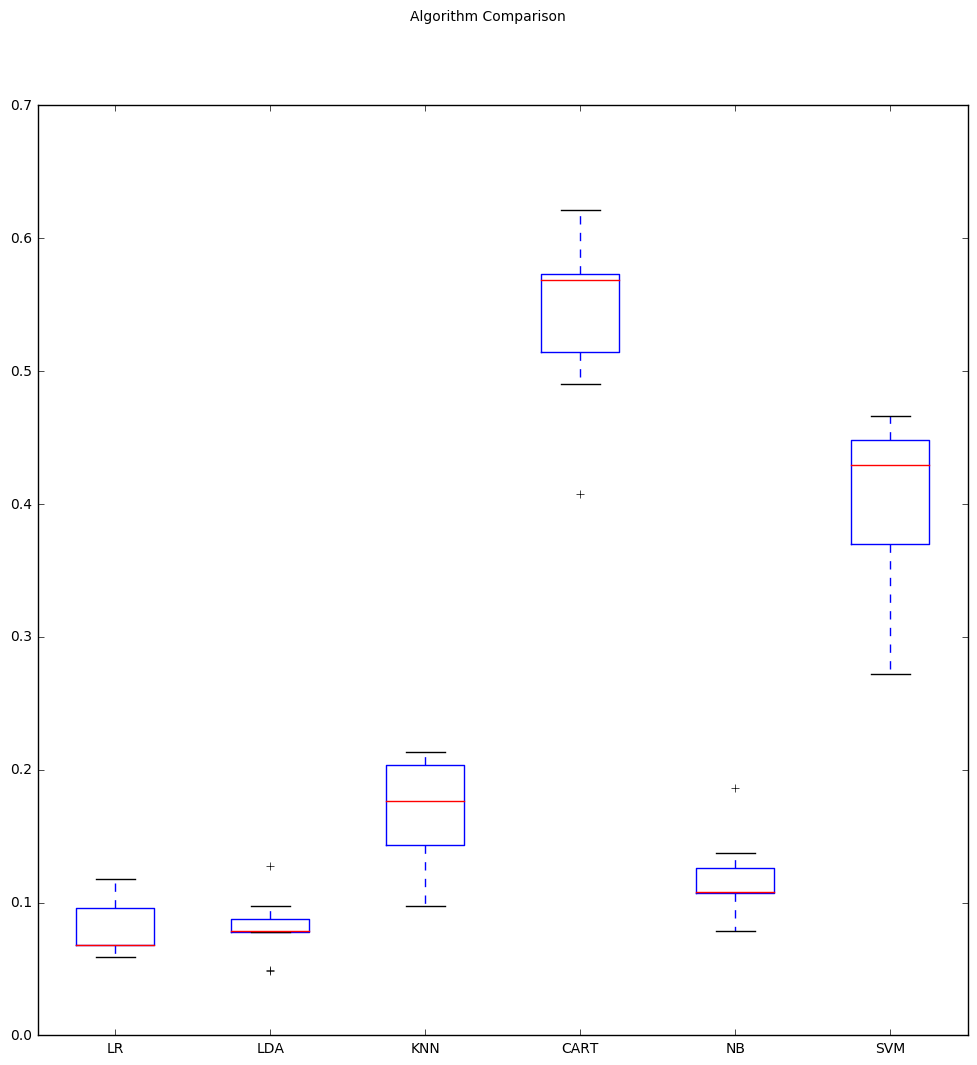

In [68]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.53125
[[13  0  0 ...,  0  0  0]
 [ 0  5  0 ...,  0  0  0]
 [ 0  1  1 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  1]]
             precision    recall  f1-score   support

       -215       0.72      0.93      0.81        14
       -173       0.50      0.71      0.59         7
       -147       0.25      0.25      0.25         4
       -145       0.43      0.30      0.35        10
       -141       0.47      0.70      0.56        10
       -117       0.00      0.00      0.00         0
       -106       0.00      0.00      0.00         2
       -103       0.57      0.67      0.62         6
       -100       1.00      0.55      0.71        11
        -77       0.67      0.67      0.67         6
        -74       0.62      0.71      0.67         7
        -71       0.43      0.50      0.46        26
        -67       0.00      0.00      0.00         2
        -36       0.67      0.40      0.50         5
        -33       0.57      0.80

C:\Users\Moxigeren\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Moxigeren\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Finding Predictors for Hemoglobin Levels

I decided to look into the following predictors, asset index, mother age, Altitude, mother weight median, and sex. I was especially interested in sex as Kenya is not as developed as some other countries and I was curious to see if one gender was prioritized to for development. I engage in the same plane of attack as with mother weight median. ASset index, mother age, GPS Altitude, appear to be positively correlated while Mother Weight and Sex appear to be negatively correlated. For this example 0 is set to female whereas males are set to 1. This indicates that males are expected to have lower hemoglobin levels ceteris paribus. It is interesting to note that while asset index was quite significant in the previous OLS, it is not in this one. 

In [92]:
dataset2 = pd.read_csv("~/Desktop/STA141B/hemo.csv", header = 0)
dataset2.head()

,cm_20_317b,assetindex,mother_age,GPS_alt,motherweightmed,sex
0,NaN,-1.416872,19.885010,1329.642,41.25,0.0
1,NaN,-0.679135,27.594798,1328.048,NaN,1.0
2,NaN,-0.357541,27.720739,1354.849,NaN,1.0
3,NaN,-0.043879,27.263518,1331.068,NaN,1.0
4,NaN,-1.416872,19.561944,1181.271,NaN,NaN


In [93]:
dataset2 = dataset2.dropna(subset = ['cm_20_317b','assetindex', 'mother_age', 'GPS_alt', 'motherweightmed','sex'])
dataset2['assetindex'] = dataset2['assetindex']*100

In [94]:
dataset2 = dataset2.astype(int)
dataset2.head()

,cm_20_317b,assetindex,mother_age,GPS_alt,motherweightmed,sex
162,11,-141,29,1355,71,0
183,10,-71,22,1351,62,0
388,10,26,18,1347,66,1
437,11,510,21,1327,48,0
439,10,-100,28,1455,50,1


In [95]:
print(dataset2.describe())

       cm_20_317b  assetindex  mother_age      GPS_alt  motherweightmed  \
count  106.000000  106.000000  106.000000   106.000000       106.000000   
mean    10.952830   21.858491   25.566038  1382.169811        59.264151   
std      1.198269  163.522369    5.628191   161.047241        11.274329   
min      8.000000 -215.000000   16.000000   815.000000        43.000000   
25%     10.000000  -71.000000   21.000000  1284.000000        52.250000   
50%     11.000000   -4.000000   26.000000  1345.000000        57.000000   
75%     12.000000   66.750000   29.750000  1528.000000        63.750000   
max     13.000000  516.000000   40.000000  1624.000000        97.000000   

              sex  
count  106.000000  
mean     0.660377  
std      0.475831  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


In [96]:
lm2= smf.ols(formula = 'cm_20_317b ~ assetindex + mother_age + GPS_alt + motherweightmed + sex', data = dataset2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cm_20_317b   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     7.949
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           2.43e-06
Time:                        21:58:52   Log-Likelihood:                -151.34
No. Observations:                 106   AIC:                             314.7
Df Residuals:                     100   BIC:                             330.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          10.2064      1.075      9.494      0.000         8.074    12.339
assetindex          0.0009      0.001      1.397      0.166        -0.000     0.002
mother_age          0.0355      0.019      1.871      0.064        -0.002     0.073
GPS_alt             0.0019      0.001      2.899      0.005         0.001     0.003
motherweightmed    -0.0431      0.009     -4.674      0.000        -0.061    -0.025
sex                -0.4414      0.215     -2.053      0.043        -0.868    -0.015
==============================================================================
Omnibus:                        4.878   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.244
Skew:                          -0.454   Prob(JB):                        0.120
Kurtosis:                       3.369   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

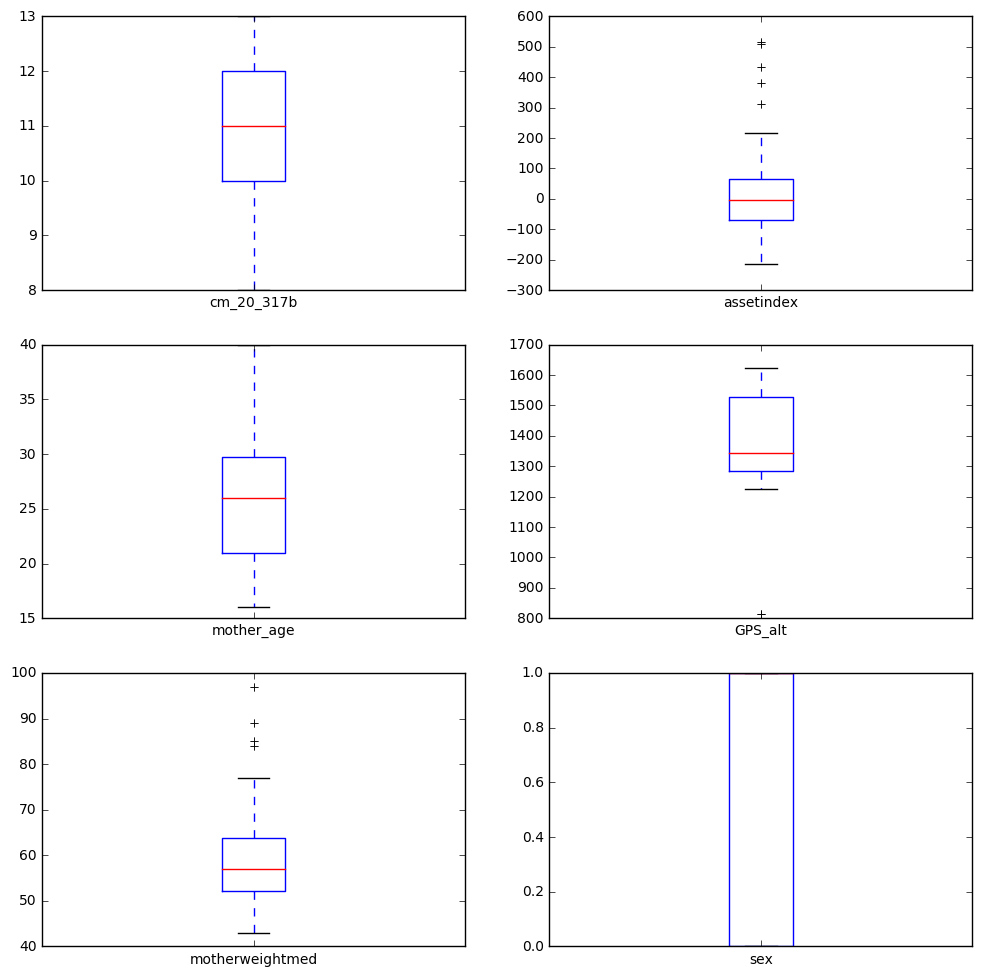

In [97]:
dataset2.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False)
plt.show()

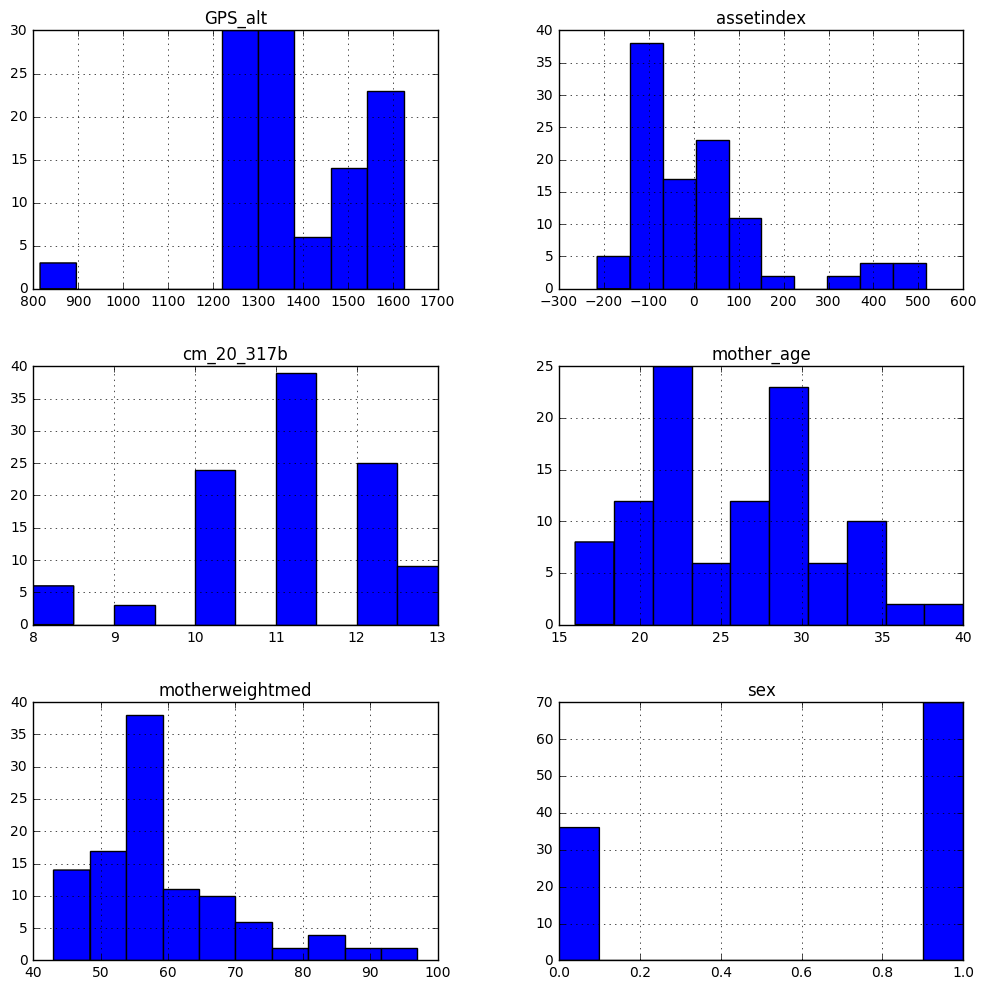

In [98]:
dataset2.hist()
plt.show()

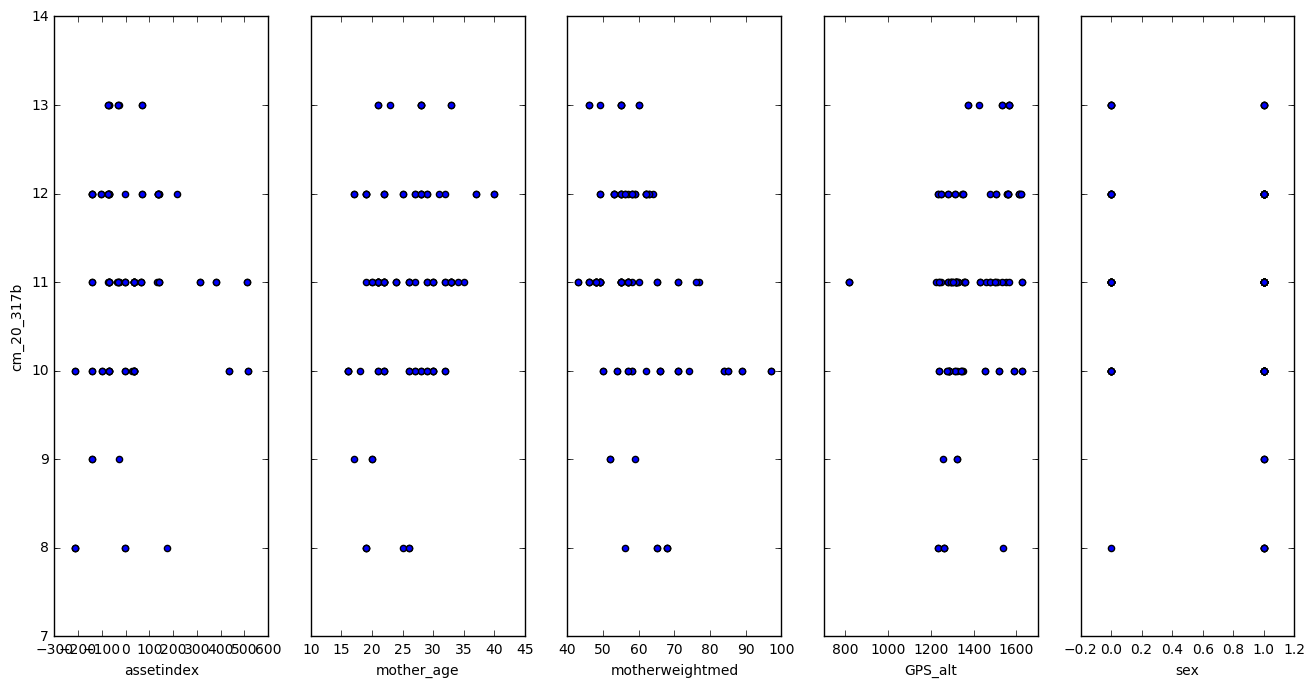

In [99]:
fig, axs = plt.subplots(1, 5, sharey=True)
dataset2.plot(kind='scatter', x='assetindex', y='cm_20_317b', ax=axs[0], figsize=(16, 8))
dataset2.plot(kind='scatter', x='mother_age', y='cm_20_317b', ax=axs[1])
dataset2.plot(kind='scatter', x='motherweightmed', y='cm_20_317b', ax=axs[2])
dataset2.plot(kind='scatter', x='GPS_alt', y='cm_20_317b', ax=axs[3])
dataset2.plot(kind='scatter', x='sex', y='cm_20_317b', ax=axs[4])

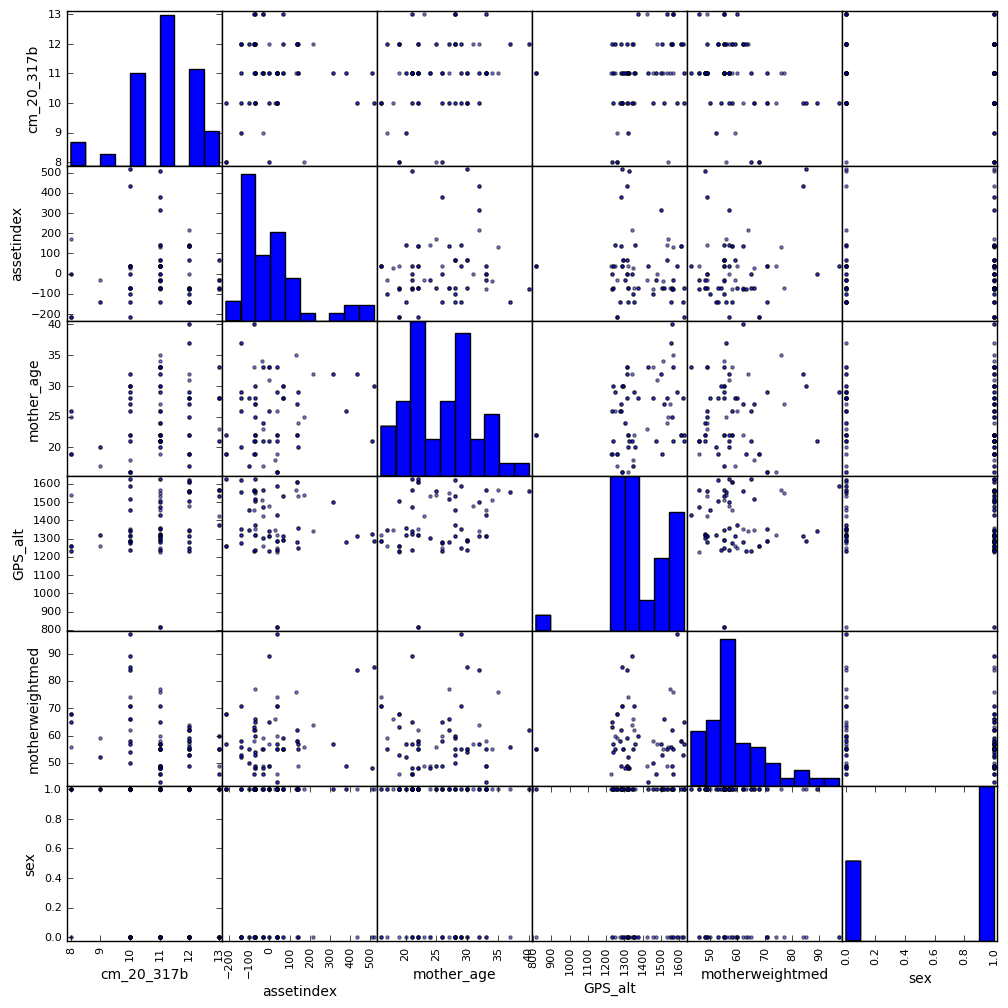

In [100]:
scatter_matrix(dataset2)
plt.show()

In [101]:
array = dataset2.values
X = array[:,0:5]
Y = array[:,5]
validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [102]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [103]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.641667 (0.163016)
LDA: 0.591667 (0.169899)
KNN: 0.643056 (0.166557)
CART: 0.430556 (0.176886)
NB: 0.534722 (0.189241)
SVM: 0.597222 (0.166782)


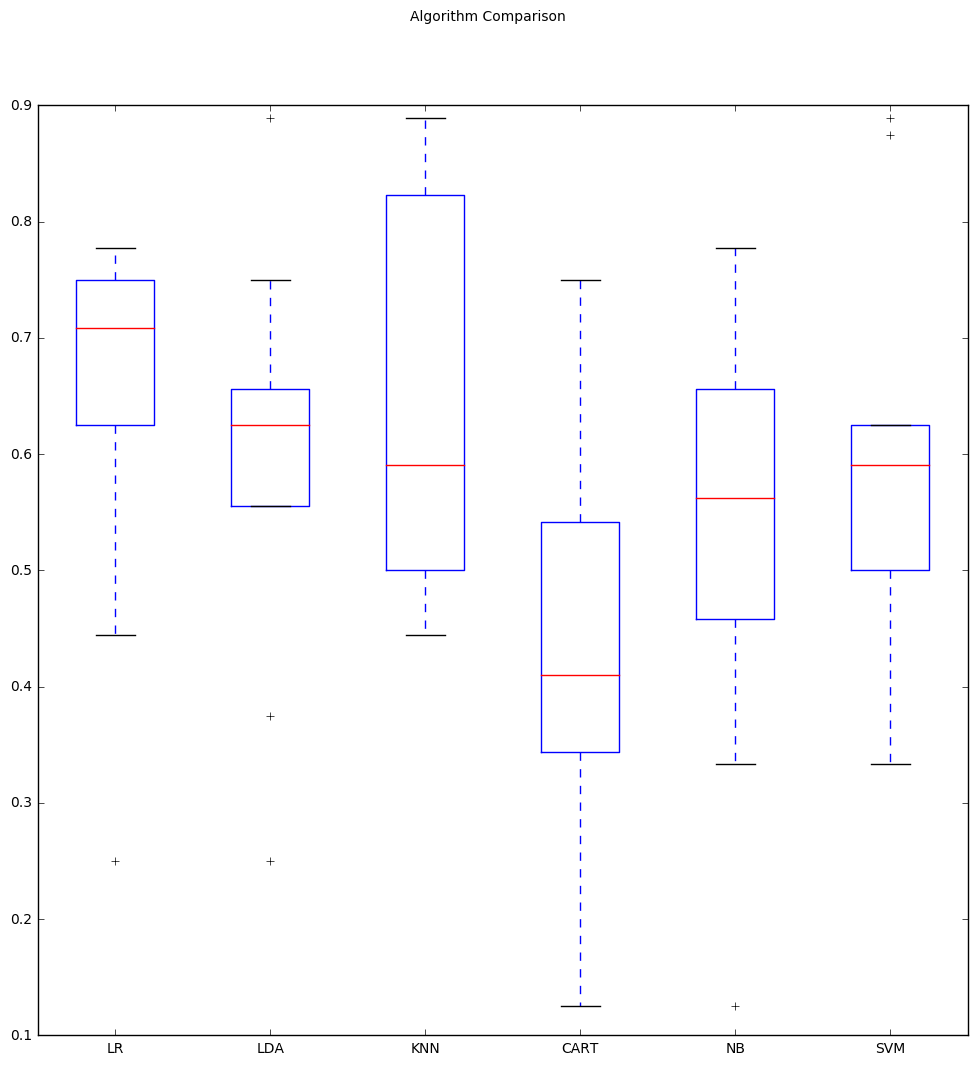

In [104]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.590909090909
[[ 0  8]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.62      0.93      0.74        14

avg / total       0.39      0.59      0.47        22



# Machine Learning Model. 

Precision recall and f1-score all appear to be 0 for females, but for males the value is quite high, higher than the case with mother weight median.

# Additional Explorations

I decided to do some further explorations by plotting based on categories. I plotted child height median v.s. asset index and separated the two by gender. The width of the male values appear to be wider than that of the females. I also plotted child height median v.s. mother weight as I found that whether or not the father worked in agriculture was very significant at the .001 level when mother weight was not included in the model, but once it was included, father job no longer was important. 

In [112]:
df3 = pd.read_csv("~/Desktop/STA141B/sex.csv", header = 0)
df3 = df3.dropna() 
df3.head()

,sex,assetindex,childhtmedian,father_agri,motherweightmed,d2
0,Female,-1.416872,74.8,works in ag,41.25,PROTECTED SPRING (HAS CONCRETE LINING
13,Female,-0.744224,83.4,does not work in ag,57.35,PROTECTED DUG WELL (HAS CONCRETE LINING
21,Male,0.668457,75.0,does not work in ag,63.50,PROTECTED SPRING (HAS CONCRETE LINING
36,Female,1.108157,82.0,works in ag,55.80,UNPROTECTED SPRING
52,Male,1.015451,82.2,does not work in ag,52.20,PROTECTED DUG WELL (HAS CONCRETE LINING


In [107]:
import bokeh.io

bokeh.io.output_notebook()

Loading BokehJS ...

In [108]:
import bokeh.charts

plt = bokeh.charts.Scatter(df3, x = "assetindex", y = "childhtmedian", title = "Child Height Median v.s. Asset Index based on Child Gender", color = "sex",
    webgl = True, tools = "wheel_zoom,pan", active_scroll = "wheel_zoom"
)
bokeh.charts.show(plt)


In [109]:
plt = bokeh.charts.Scatter(df3, x = "motherweightmed", y = "childhtmedian", title = "Child Height Median v.s. Mother Weight Median based on Father job presence in AG", color = "father_agri",
    webgl = True, tools = "wheel_zoom,pan", active_scroll = "wheel_zoom"
)
bokeh.charts.show(plt)

In [110]:
plt = bokeh.charts.Scatter(df3, x = "assetindex", y = "childhtmedian", color = "d2",
    webgl = True, tools = "wheel_zoom,pan", active_scroll = "wheel_zoom"
)
bokeh.charts.show(plt)

# Conclusion
While we have some interesting findings and visuals, there is much room for improvement. One of the greatest tasks I had was trying to explain the topics of interest without forcing the findings. This can be best explained by the following comic:

https://xkcd.com/882/

I would like to find more variables to add to create more accurate models. I did find it very interesting that asset index was significant for child height median but not for hemoglobin levels. However due to the large scope of the data, it is possible that either scenario is being confounded by another variable as was the case with father participation in agriculture. Because of this, I would hesitate to use these findings for more focused interventions as it would be a potential waste of resources (i.e. increase asset index may not be that helpful for child weight). 